# Car Accident detection from CCTV images using Xception Architecture
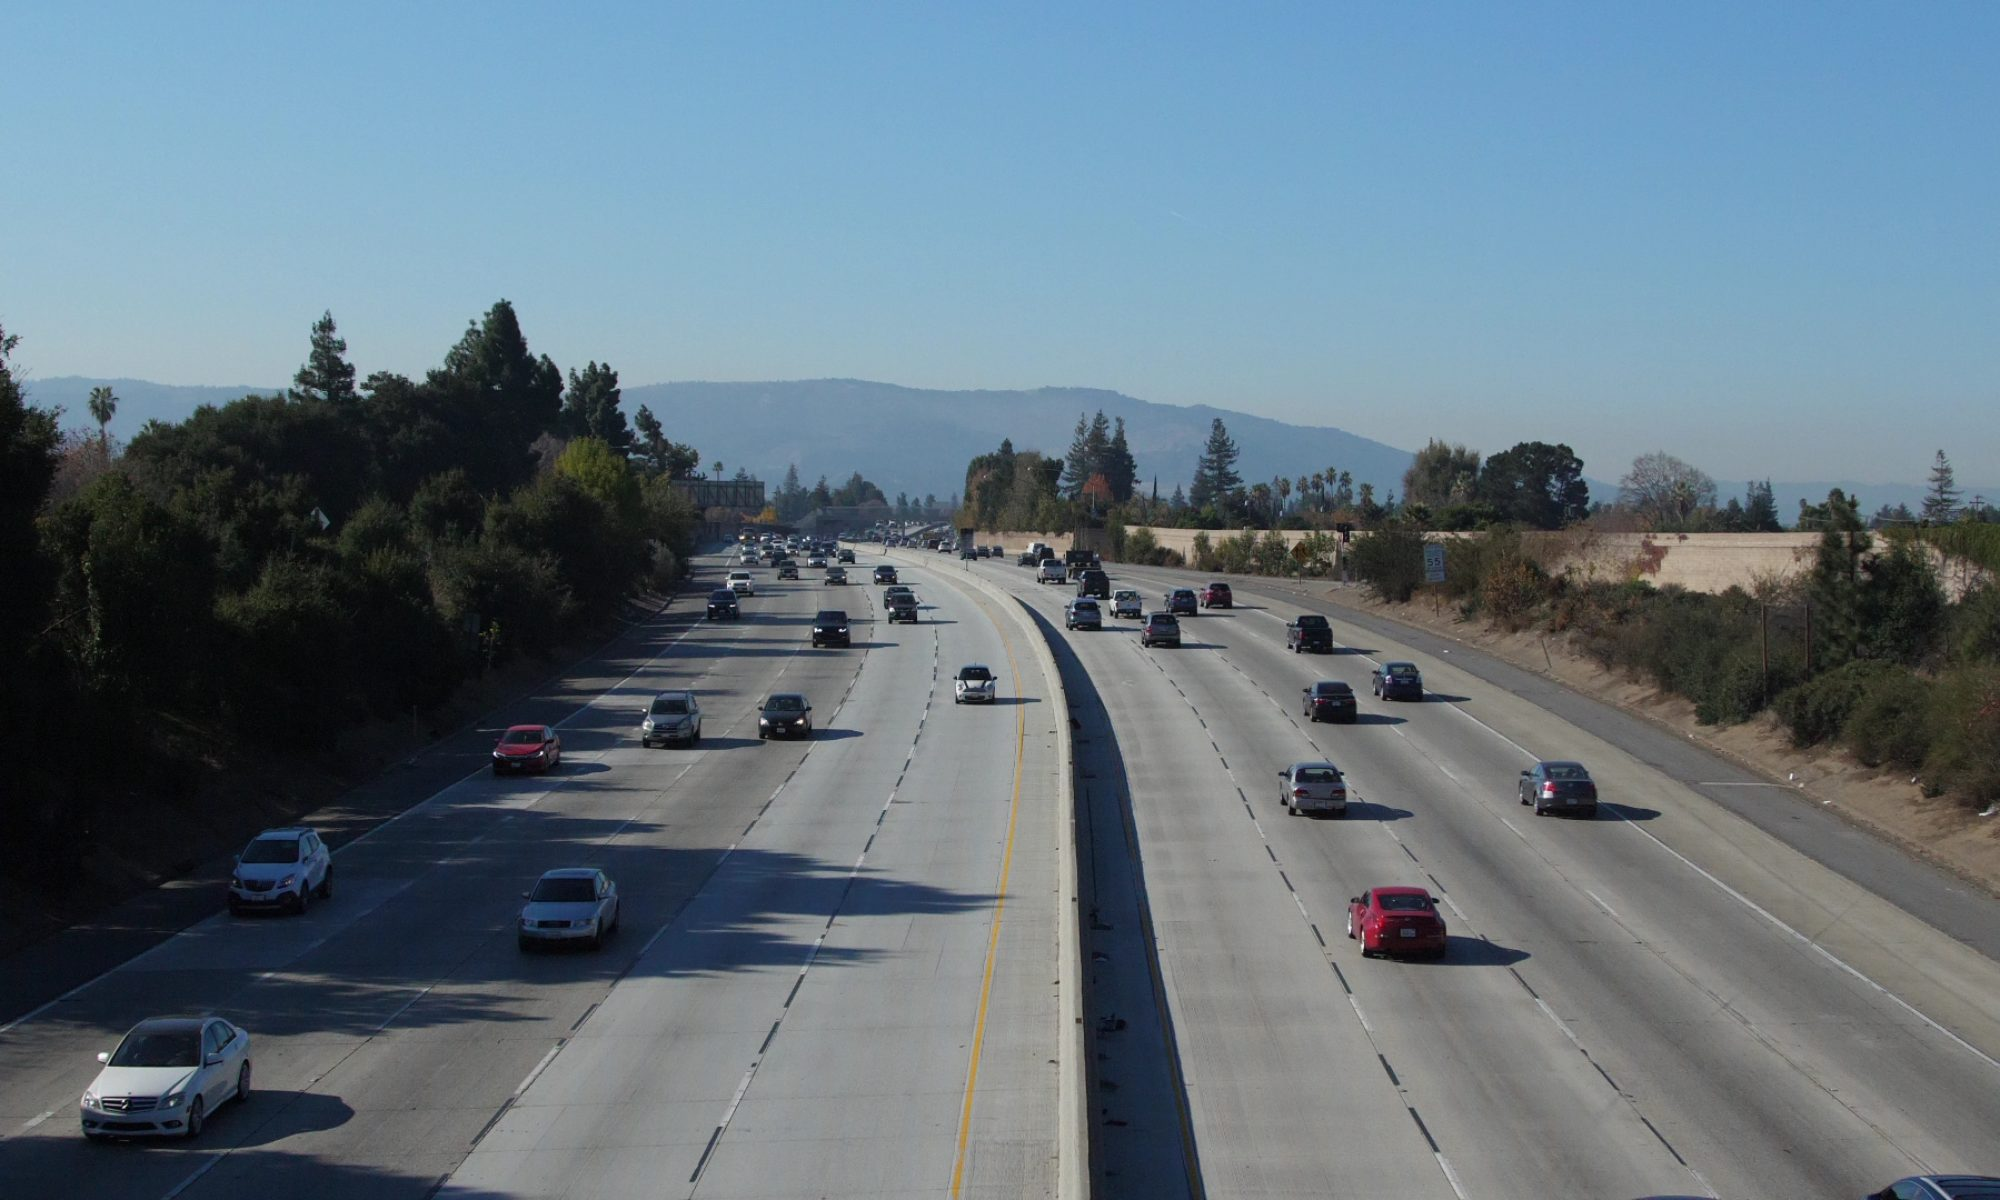

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [4]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# Taking Dataset from Google Drive

In [5]:
# Store the base directory path

base_dir = os.path.join("/content/drive/MyDrive/Accident data/")
print('Base directory --> ', os.listdir(base_dir))

Base directory -->  ['val', 'train', 'test']


# Train, Test and Validation path

In [6]:
train_dir = os.path.join(base_dir + "train/")
print("Train Directory --> ", os.listdir(train_dir))

validation_dir = os.path.join(base_dir + "val/")
print("Validation Directory --> ", os.listdir(validation_dir))

test_dir = os.path.join(base_dir + "test/")
print("Test Directory --> ", os.listdir(test_dir))

Train Directory -->  ['Non Accident', 'Accident']
Validation Directory -->  ['Non Accident', 'Accident']
Test Directory -->  ['Non Accident', 'Accident']


# Samples of Accident Images

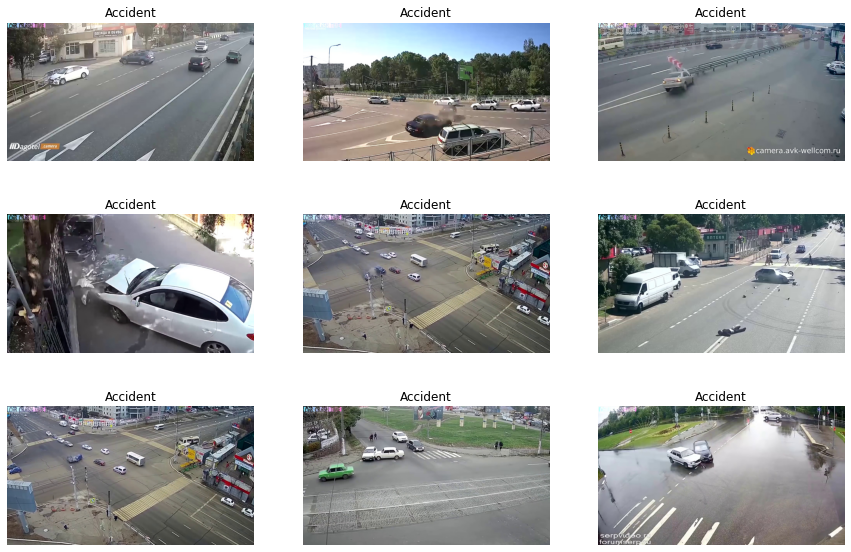

In [7]:

fig, ax = plt.subplots(3, 3, figsize=(15, 10))

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[0,0].imshow(accident_image)
ax[0,0].set_title("Accident")
ax[0,0].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[0,1].imshow(accident_image)
ax[0,1].set_title("Accident")
ax[0,1].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[0,2].imshow(accident_image)
ax[0,2].set_title("Accident")
ax[0,2].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[1,0].imshow(accident_image)
ax[1,0].set_title("Accident")
ax[1,0].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[1,1].imshow(accident_image)
ax[1,1].set_title("Accident")
ax[1,1].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[1,2].imshow(accident_image)
ax[1,2].set_title("Accident")
ax[1,2].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[2,0].imshow(accident_image)
ax[2,0].set_title("Accident")
ax[2,0].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[2,1].imshow(accident_image)
ax[2,1].set_title("Accident")
ax[2,1].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[2,2].imshow(accident_image)
ax[2,2].set_title("Accident")
ax[2,2].axis("Off")
plt.show()

# Sample of Normal Images

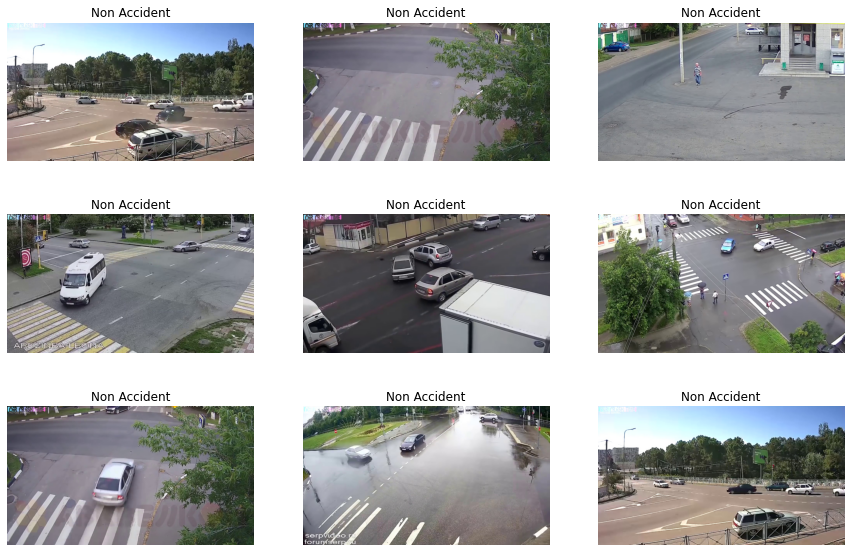

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[0,0].imshow(non_accident_image)
ax[0,0].set_title("Non Accident")
ax[0,0].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[0,1].imshow(non_accident_image)
ax[0,1].set_title("Non Accident")
ax[0,1].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[0,2].imshow(non_accident_image)
ax[0,2].set_title("Non Accident")
ax[0,2].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[1,0].imshow(non_accident_image)
ax[1,0].set_title("Non Accident")
ax[1,0].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[1,1].imshow(non_accident_image)
ax[1,1].set_title("Non Accident")
ax[1,1].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[1,2].imshow(non_accident_image)
ax[1,2].set_title("Non Accident")
ax[1,2].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[2,0].imshow(non_accident_image)
ax[2,0].set_title("Non Accident")
ax[2,0].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[2,1].imshow(non_accident_image)
ax[2,1].set_title("Non Accident")
ax[2,1].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[2,2].imshow(non_accident_image)
ax[2,2].set_title("Non Accident")
ax[2,2].axis("Off")

plt.show()

# Building Xception Architecture

In [9]:
from tensorflow.keras.applications import Xception

backbone = Xception(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

83689472/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
_________________________________________________________________


# Choosing Accuracy matrix

In [10]:
metrics_list = ['accuracy']

# Compiling with Adam Optimizer and Loss function is Binary Crossentropy

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = metrics_list)

# Train Data Generation

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), class_mode = 'binary', batch_size = 100)

Found 791 images belonging to 2 classes.


# Validation Data Generation

In [13]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = (150, 150), class_mode = 'binary', batch_size = 16)

Found 98 images belonging to 2 classes.


# Test Data Generation

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150, 150), class_mode = 'binary', batch_size = 44)

Found 100 images belonging to 2 classes.


# Fitting the Dataset into the Model

In [17]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = (791/100),
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = (98/16),
    verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
7/7 [==============================] - 15s 2s/step - loss: 0.0459 - accuracy: 0.9760 - val_loss: 0.6832 - val_accuracy: 0.8980
Epoch 2/100
7/7 [==============================] - 15s 2s/step - loss: 0.0342 - accuracy: 0.9823 - val_loss: 0.4412 - val_accuracy: 0.8878
Epoch 3/100
7/7 [==============================] - 15s 2s/step - loss: 0.0671 - accuracy: 0.9772 - val_loss: 0.8011 - val_accuracy: 0.8878
Epoch 4/100
7/7 [==============================] - 15s 2s/step - loss: 0.0534 - accuracy: 0.9848 - val_loss: 4.0224 - val_accuracy: 0.6633
Epoch 5/100
7/7 [==============================] - 15s 2s/step - loss: 0.0465 - accuracy: 0.9772 - val_loss: 10.3075 - val_accuracy: 0.5816
Epoch 6/100
7/7 [==============================] - 15s 2s/step - loss: 0.0485 - accuracy: 0.9823 - val_loss: 1.9046 - val_accuracy: 0.8061
Epoch 7/100
7/7 [==============================] - 15s 2s/step - loss: 0.0281 - accuracy: 0.9836 - val_loss: 1.1690 - val_accuracy: 0.8469
Epoch 8/100
7/7 [=========

# Storing the Model into Desktop

In [22]:
model.save("model_brain_Xception.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting Accuracy and Val_Accuracy

In [10]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=acc, name='Actual Value',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(y=val_acc, name = 'Predicted Value',
                         line=dict(color='firebrick', width=5)))

# Plotting Loss and Val_Loss

In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=loss, name='Actual Value',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(y=val_loss, name = 'Predicted Value',
                         line=dict(color='firebrick', width=5)))

# Prediction For Test Set

In [23]:
model.predict(test_generator, steps = int(100/44))

array([[2.96040707e-06],
       [9.01492822e-05],
       [9.99987483e-01],
       [3.95656243e-05],
       [1.09760847e-04],
       [1.30123249e-06],
       [1.35913672e-06],
       [5.02086505e-06],
       [9.97496188e-01],
       [9.99986172e-01],
       [9.99999404e-01],
       [1.07694450e-06],
       [9.99999404e-01],
       [9.99970436e-01],
       [7.24780080e-07],
       [8.04094889e-05],
       [1.33533615e-06],
       [1.82613064e-06],
       [9.99972105e-01],
       [9.99948263e-01],
       [9.99988198e-01],
       [9.99991655e-01],
       [9.91181731e-01],
       [1.11227328e-05],
       [2.54261317e-06],
       [1.70405303e-06],
       [9.99994874e-01],
       [7.90785998e-06],
       [9.99999642e-01],
       [9.89777709e-06],
       [9.99994397e-01],
       [1.00000000e+00],
       [6.29547731e-06],
       [9.99996424e-01],
       [9.99986768e-01],
       [1.21192024e-05],
       [7.38610379e-06],
       [1.92768475e-05],
       [1.69749205e-06],
       [4.76010655e-06],


# Model Evaluation

In [26]:
m = model.evaluate(test_generator)
print(m)

3/3 [==============================] - 2s 408ms/step - loss: 0.0600 - accuracy: 0.9700
[0.05995101481676102, 0.9700000286102295]


# Model Accuracy

In [27]:
print('Accuracy : ',m[1])
print('Loss : ',m[0])

Accuracy :  0.9700000286102295
Loss :  0.05995101481676102


# This Model can Successfully Classify Car Accident from CCTV images with an Accuracy of 97%